## Observations and Insights 

In [495]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [496]:
# Checking the number of mice.
number_of_mice = len(combined_data_df["Mouse ID"].value_counts())
number_of_mice

249

In [497]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(*duplicate_mouse_id)

g989


In [498]:
# Optional: Get all the data for the duplicate mouse ID. 
data_for_duplicate_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989",]
data_for_duplicate_mouse.head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [499]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df.copy()
clean_combined_data_df = clean_combined_data_df.set_index("Mouse ID")
clean_combined_data_df.drop(["g989"], axis = 0, inplace = True)

In [500]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df = clean_combined_data_df.reset_index()
clean_combined_data_df_count = len(clean_combined_data_df["Mouse ID"].value_counts())
clean_combined_data_df_count

248

In [501]:
# clean_combined_data_df-excludes Mouse ID g989
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [502]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_combined_data_df_stats = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_combined_data_df_stats["Mean Tumor Volume"] = clean_combined_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Median Tumor Volume"] = clean_combined_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Tumor Volume Variance"] = clean_combined_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Tumor Std. Dev."] = clean_combined_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Tumor Volume Std. Err."] = clean_combined_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
clean_combined_data_df_stats_summary = clean_combined_data_df_stats[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Std. Dev.", "Tumor Volume Std. Err."]]  

# Assemble the resulting series into a single summary dataframe.
# clean_combined_data_df_stats_summary

In [503]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_combined_data_df_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [504]:
# Using the aggregation method, produce the same summary statistics in a single line 
clean_combined_data_df_stats_clean_agg = clean_combined_data_df
clean_combined_data_df_stats_clean_agg = clean_combined_data_df_stats_clean_agg.groupby("Drug Regimen")
clean_combined_data_df_stats_clean_agg = clean_combined_data_df_stats_clean_agg.agg(['mean', 'median', 'var', 'std', 'sem'])                                            
clean_combined_data_df_stats_clean_agg = clean_combined_data_df_stats_clean_agg['Tumor Volume (mm3)']
clean_combined_data_df_stats_clean_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

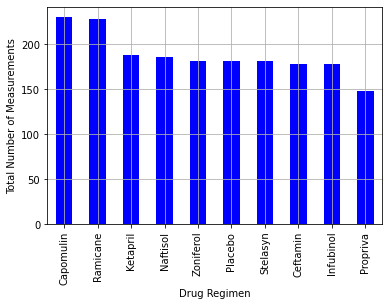

In [505]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas (df.plot).
clean_pandas_chart = clean_combined_data_df
clean_pandas_chart = clean_pandas_chart.groupby("Drug Regimen").Timepoint.count()
clean_pandas_chart = pd.DataFrame(clean_pandas_chart)
clean_pandas_chart = clean_pandas_chart.sort_values(["Timepoint"],ascending=False)
clean_pandas_chart.plot.bar(xlabel="Drug Regimen", ylabel="Total Number of Measurements", legend="", grid=True, color="blue")

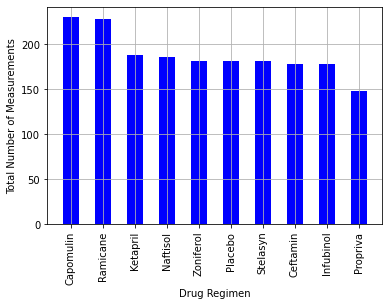

<Figure size 432x288 with 0 Axes>

In [506]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot(plt.show()).
clean_pyplot_chart = clean_combined_data_df
clean_pyplot_chart = clean_pyplot_chart.groupby("Drug Regimen").Timepoint.count()
clean_pyplot_chart = pd.DataFrame(clean_pyplot_chart)
clean_pyplot_chart = clean_pyplot_chart.sort_values(["Timepoint"],ascending=False)
timepoints = (clean_pyplot_chart["Timepoint"].to_list())
drugregimen = (clean_pyplot_chart.index.to_list())
plt.bar(drugregimen, timepoints, facecolor="blue", align="center", width=0.5)
plt.xlabel("Drug Regimen"), plt.ylabel("Total Number of Measurements"), plt.grid("True")
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

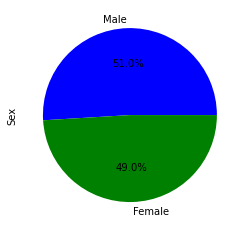

In [507]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
clean_pandas_pie_chart = clean_combined_data_df
clean_pandas_pie_chart = clean_pandas_pie_chart.groupby("Sex").count()
clean_pandas_pie_chart = clean_pandas_pie_chart.sort_values(["Mouse ID"],ascending=False)
clean_pandas_pie_chart_summary = clean_pandas_pie_chart["Mouse ID"]
clean_pandas_pie_chart_summary = pd.DataFrame(clean_pandas_pie_chart_summary)
clean_pandas_pie_chart_summary.plot.pie(subplots=True, ylabel="Sex", legend=False, autopct="%1.1f%%", colors=["blue","green"])

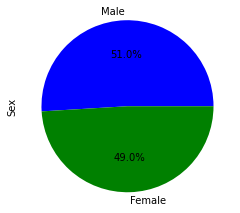

In [508]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_pyplot_pie_chart = clean_combined_data_df
clean_pyplot_pie_chart = clean_pyplot_pie_chart.groupby("Sex").count()
clean_pyplot_pie_chart = clean_pyplot_pie_chart.sort_values(["Mouse ID"],ascending=False)
clean_pyplot_pie_chart_summary = clean_pyplot_pie_chart["Mouse ID"]
clean_pyplot_pie_chart_summary = pd.DataFrame(clean_pyplot_pie_chart_summary)
number_id = (clean_pyplot_pie_chart_summary["Mouse ID"].to_list())
labels = (clean_pyplot_pie_chart_summary.index.to_list())
fig1, ax1 = plt.subplots(figsize=(3.8,3.5))
plt.pie(number_id, colors=("blue","green"),autopct="%1.1f%%", labels=labels)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [509]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#    Separate Dataframe for each Regimen.
Capomulin_df = clean_combined_data_df.loc[clean_combined_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_combined_data_df.loc[clean_combined_data_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_combined_data_df.loc[clean_combined_data_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_combined_data_df.loc[clean_combined_data_df["Drug Regimen"] == "Ceftamin",:]

#    Groupby by Regimen and Mouse ID to obtain the latest (hightest) timepoint for each mouse
capomulin_df_greatest_timepoint_by_mouse = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_df_greatest_timepoint_by_mouse = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_df_greatest_timepoint_by_mouse = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_df_greatest_timepoint_by_mouse = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#    Separte merged df's for each regimin by mouse id and last timepoint 
capomulin_df_tumor_vol_at_max_point = pd.merge(capomulin_df_greatest_timepoint_by_mouse, clean_combined_data_df, on=("Mouse ID","Timepoint"), how="left")
ramicane_df_tumor_vol_at_max_point = pd.merge(ramicane_df_greatest_timepoint_by_mouse, clean_combined_data_df, on=("Mouse ID","Timepoint"), how="left")
infubinol_tumor_vol_at_max_point = pd.merge(infubinol_df_greatest_timepoint_by_mouse, clean_combined_data_df, on=("Mouse ID","Timepoint"), how="left")
ceftamin_tumor_vol_at_max_point = pd.merge(ceftamin_df_greatest_timepoint_by_mouse, clean_combined_data_df, on=("Mouse ID","Timepoint"), how="left")


In [510]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

capomulin_max_tumor_vol_by_mouse = capomulin_df_tumor_vol_at_max_point["Tumor Volume (mm3)"]
ramicane_max_tumor_vol_by_mouse = ramicane_df_tumor_vol_at_max_point["Tumor Volume (mm3)"]
infubinol_max_tumor_vol_by_mouse = infubinol_tumor_vol_at_max_point["Tumor Volume (mm3)"]
ceftamin_max_tumor_vol_by_mouse = ceftamin_tumor_vol_at_max_point["Tumor Volume (mm3)"] 


In [511]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Quartiles by Drug Regimen
cap_quartiles = capomulin_max_tumor_vol_by_mouse.quantile([.25,.5,.75])
ram_quartiles = ramicane_max_tumor_vol_by_mouse.quantile([.25,.5,.75])
inf_quartiles = infubinol_max_tumor_vol_by_mouse.quantile([.25,.5,.75])
cef_quartiles = ceftamin_max_tumor_vol_by_mouse.quantile([.25,.5,.75]) 

In [512]:
# Determine outliers using upper and lower bounds
    #Lower Quartiles for each Drug Regimen
cap_lowerq = cap_quartiles[.25]
ram_lowerq = ram_quartiles[.25]
inf_lowerq = inf_quartiles[.25]
cef_lowerq = cef_quartiles[.25] 
    
    #Upper Quartiles for each Drug Regimen
cap_upperq = cap_quartiles[.75]
ram_upperq = ram_quartiles[.75]
inf_upperq = inf_quartiles[.75]
cef_upperq = cef_quartiles[.75]  

# To calculate the IQR for each Drug Regimen  

    #IQR for each Drug Regimen
cap_iqr = cap_upperq-cap_lowerq
ram_iqr = ram_upperq-ram_lowerq
inf_iqr = inf_upperq-inf_lowerq
cef_iqr = cef_upperq-cef_lowerq
    
    #Lower Bound for each Drug Regimen
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
   
    #Upper Bound for each Drug Regimen
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)


In [513]:
# Quantitative analysis to assist in identifing any potentional lower or upper outliers for the four Drug Regimens

cap_low_outliers=(capomulin_max_tumor_vol_by_mouse[capomulin_max_tumor_vol_by_mouse<cap_lower_bound]).to_list()
cap_high_outliers=(capomulin_max_tumor_vol_by_mouse[capomulin_max_tumor_vol_by_mouse>cap_upper_bound]).to_list()

ram_low_outliers=(ramicane_max_tumor_vol_by_mouse[ramicane_max_tumor_vol_by_mouse<ram_lower_bound]).to_list()
ram_high_outliers=(ramicane_max_tumor_vol_by_mouse[ramicane_max_tumor_vol_by_mouse>ram_upper_bound]).to_list()

inf_low_outliers=(infubinol_max_tumor_vol_by_mouse[infubinol_max_tumor_vol_by_mouse<inf_lower_bound]).to_list()
inf_high_outliers=(infubinol_max_tumor_vol_by_mouse[infubinol_max_tumor_vol_by_mouse>inf_upper_bound]).to_list()

cef_low_outliers=(ceftamin_max_tumor_vol_by_mouse[ceftamin_max_tumor_vol_by_mouse<cef_lower_bound]).to_list()
cef_high_outliers=(ceftamin_max_tumor_vol_by_mouse[ceftamin_max_tumor_vol_by_mouse>cef_upper_bound]).to_list()

# To print the IQR and any potential outliers for each of the four Drug Regimens

print(f"Interquartile Range (IQR) calculations for Capomulin, Ramicane, Infuinol and Ceftamin:\n")
print(f"The IQR for Capomulin is {round(cap_iqr,2)}") 
print(f"The IQR for Ramicane is {round(ram_iqr,2)}") 
print(f"The IQR for Infubinol is {round(inf_iqr,2)}") 
print(f"  Note: For Infubinol, there is one potential outlier of {round((*inf_low_outliers),2)} which falls below the lower bound calculation of {round(inf_lower_bound,2)}")
print(f"The IQR for Ceftamin is {round(cef_iqr,2)}")
# print(f"{cap_low_outliers},{cap_high_outliers},{ram_low_outliers},{ram_high_outliers},{inf_low_outliers},{inf_high_outliers},{cef_low_outliers},{cef_high_outliers}")

Interquartile Range (IQR) calculations for Capomulin, Ramicane, Infuinol and Ceftamin:

The IQR for Capomulin is 7.78
The IQR for Ramicane is 9.1
The IQR for Infubinol is 11.48
  Note: For Infubinol, there is one potential outlier of 36.32 which falls below the lower bound calculation of 36.83
The IQR for Ceftamin is 15.58


<function matplotlib.pyplot.show(close=None, block=None)>

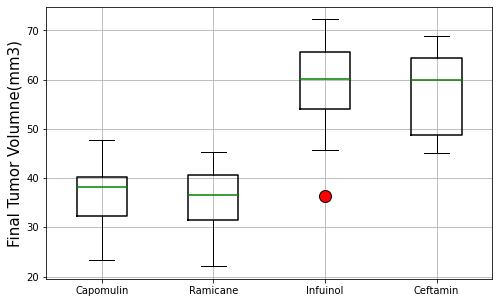

In [523]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_for_box_plot = (capomulin_max_tumor_vol_by_mouse, ramicane_max_tumor_vol_by_mouse, infubinol_max_tumor_vol_by_mouse,ceftamin_max_tumor_vol_by_mouse)
treatment_regimens = ["Capomulin","Ramicane","Infuinol","Ceftamin"]
outlier = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
medianprops = dict(color="green",linewidth=1.5)
boxprops = dict(color="black",linewidth=1.5)
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.set_ylabel("Final Tumor Volumne(mm3)", fontsize=15)
ax1.boxplot(data_for_box_plot, labels=treatment_regimens, flierprops=outlier, medianprops=medianprops, boxprops=boxprops)
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
plt.show

## Line and Scatter Plots

In [515]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [516]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [517]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
